In [1]:
import sys
sys.path.append('../')
from utils import *

sns.set_style('white')

# Basic Information about Chinese Data

In [2]:
prov_path = midas_path + 'by_province/'
date_path = midas_path + 'by_date/'
prov_files = os.listdir(prov_path)
date_files = os.listdir(date_path)

print(f"Total number of provinces: \t{len(prov_files)}")
print(f"Total number of dates: \t\t{len(date_files)}")
print(f"Start date of data: \t\t{min(date_files)[:-4]}")
print(f"Last date of data: \t\t{max(date_files)[:-4]}")

Total number of provinces: 	34
Total number of dates: 		86
Start date of data: 		2020-01-10
Last date of data: 		2020-04-06


# Explore China as a Whole

### General Trends

In [3]:
def single_line_plot(df, ts1, log = False):
    fg = plt.figure(figsize = (8,6))
    ax = plt.gca()
    title = f"{ts1.replace('_', ' ').title()} by Date"
    if log:
        ax.set_yscale('log')
        title += ' in Log Scale'
    plt.plot(df['date'], df[ts1], label = ts1)
    plt.scatter(df['date'], df[ts1], s = 5, marker = 'o', label = '')
    plt.legend()
    plt.xticks(df['date'][::5], rotation=30)
    plt.title(title)
    sns.despine()

def double_line_plot(df, ts1, ts2, log = False):
    fg = plt.figure(figsize = (8,6))
    ax = plt.gca()
    title = f"{ts1.replace('_', ' ').title()} and {ts2.replace('_', ' ').title()} by Date"
    if log:
        ax.set_yscale('log')
        title += ' in Log Scale'
    plt.plot(df['date'], df[ts1], label = ts1)
    plt.plot(df['date'], df[ts2], label = ts2)  
    plt.scatter(df['date'], df[ts1], s = 5, marker = 'o', label = '')
    plt.scatter(df['date'], df[ts2], s = 5, marker = 'o', label = '')
    plt.legend()
    plt.xticks(df['date'][::5], rotation=30)
    plt.title(title)
    sns.despine()

In [4]:
df = pd.read_csv(midas_path + 'chinese_by_date.csv')
df.tail()

,date,add_suspect,cumulative_suspect,new_diagnosis,cumulative_diagnosis,added_death,cumulative_death,month,day,weekday
81,2020-04-02,12,135,78,82802,4,3331,April,2.0,Thur
82,2020-04-03,11,114,73,82875,4,3335,April,3.0,Fri
83,2020-04-04,11,107,55,82930,3,3338,April,4.0,Sat
84,2020-04-05,10,88,75,83005,1,3340,April,5.0,Sun
85,2020-04-06,12,89,66,83071,0,3340,April,6.0,Mon


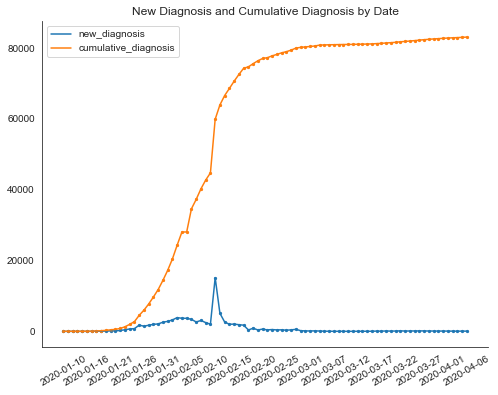

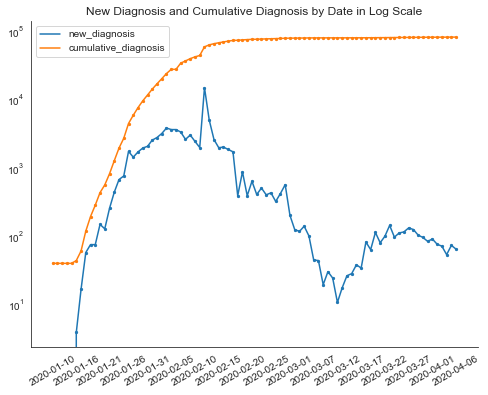

In [5]:
double_line_plot(df, 'new_diagnosis', 'cumulative_diagnosis', log = False)
double_line_plot(df, 'new_diagnosis', 'cumulative_diagnosis', log = True)

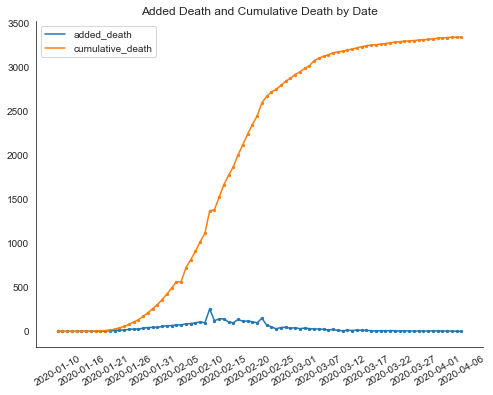

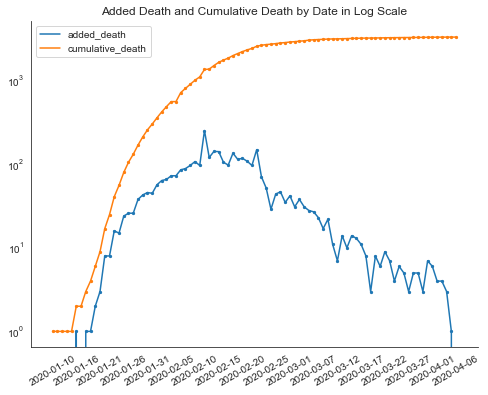

In [6]:
double_line_plot(df, 'added_death', 'cumulative_death', log = False)
double_line_plot(df, 'added_death', 'cumulative_death', log = True)

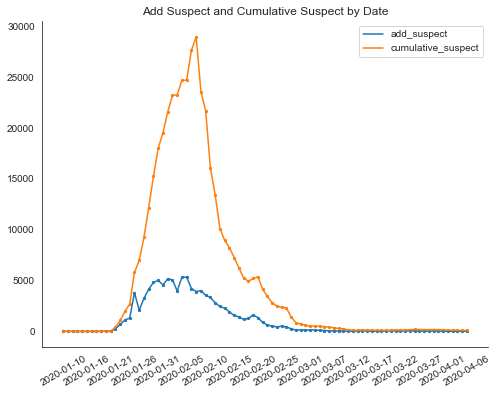

In [7]:
double_line_plot(df, 'add_suspect', 'cumulative_suspect', log = False)

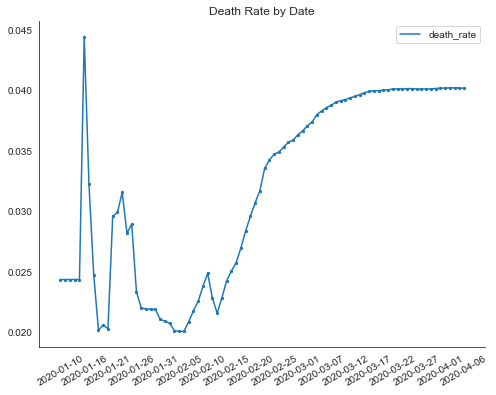

In [8]:
df['death_rate'] = df['cumulative_death'] / df['cumulative_diagnosis']
single_line_plot(df, 'death_rate')

### By weekday and month

In [9]:
print(list(df))

['date', 'add_suspect', 'cumulative_suspect', 'new_diagnosis', 'cumulative_diagnosis', 'added_death', 'cumulative_death', 'month', 'day', 'weekday', 'death_rate']


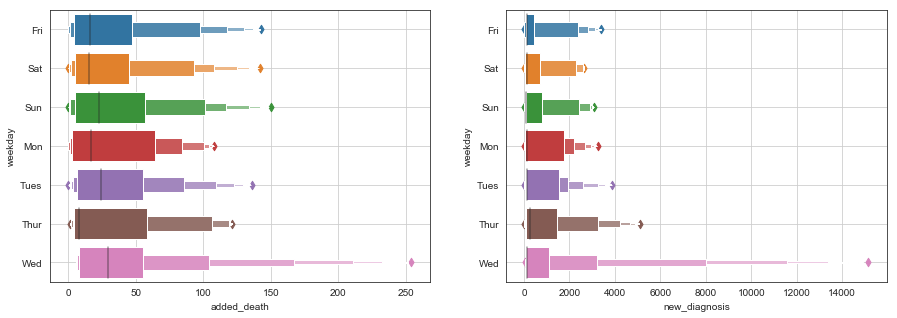

In [10]:
fg,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxenplot(data=df, y='weekday', x='added_death', scale='exponential',ax=ax[0])
ax[0].grid()
sns.boxenplot(data=df, y='weekday', x='new_diagnosis', scale='exponential',ax=ax[1])
ax[1].grid()

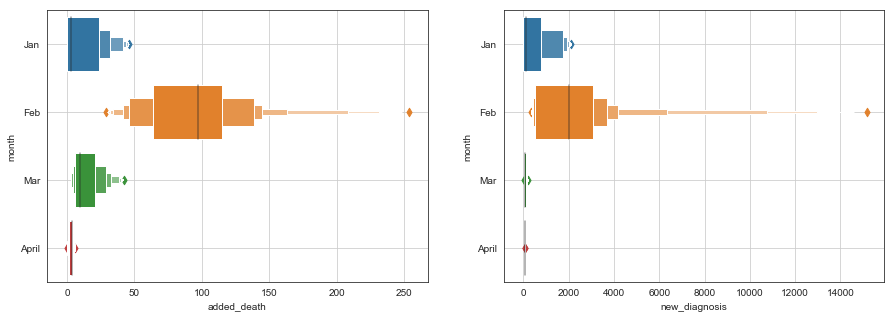

In [11]:
fg,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxenplot(data=df, y='month', x='added_death', scale='exponential',ax=ax[0])
ax[0].grid()
sns.boxenplot(data=df, y='month', x='new_diagnosis', scale='exponential',ax=ax[1])
ax[1].grid()

# By Province

In [41]:
f_path = date_path + sorted(date_files)[-1]
print("Loading:", f_path)
df = pd.read_csv(f_path)
df['death_rate'] = df['cumulative_death'] / df['cumulative_diagnosis']
df.head()

Loading: ../../data/midas_china_mst/by_date/2020-04-06.csv


,province,add_suspect,cumulative_suspect,new_diagnosis,cumulative_diagnosis,added_death,cumulative_death,date,month,day,weekday,death_rate
0,Beijing,1,4,0,587,0,8,2020-04-06,April,6.0,Mon,0.013629
1,Taiwan Province,0,0,10,373,0,5,2020-04-06,April,6.0,Mon,0.013405
2,Xinjiang Uygur Autonomous Region,0,0,0,76,0,3,2020-04-06,April,6.0,Mon,0.039474
3,Ningxia Hui Autonomous Region,0,0,0,75,0,0,2020-04-06,April,6.0,Mon,0.000000
4,Qinghai Province,0,0,0,18,0,0,2020-04-06,April,6.0,Mon,0.000000


In [52]:
prov_dict = {'Beijing':"北京", 
 'Taiwan Province':"台湾", 
 'Xinjiang Uygur Autonomous Region':"新疆",
 'Ningxia Hui Autonomous Region':"宁夏",
 'Qinghai Province':"青海",
 'Gansu province':"甘肃",
 'Shaanxi Province':"陕西",
 'Tibet Autonomous Region':"西藏",
 'Yunnan Province':"云南",
 'Guizhou Province':"贵州",
 'Sichuan Province':"四川",
 'Chongqing':"重庆",
 'Hainan':"海南",
 'Guangxi Zhuang Autonomous Region':"广西",
 'Guangdong Province':"广东",
 'Hunan Province':"湖南",
 'Hubei Province':"湖北",
 'Henan Province':"河南",
 'Tianjin':"天津",
 'Hebei Province':"河北",
 'Shanxi Province':"山西",
 'Inner Mongolia Autonomous Region':"内蒙古",
 'Liaoning Province':"辽宁",
 'Jilin Province':"吉林",
 'Hong Kong Special Administrative Region':"香港",
 'Heilongjiang Province':"黑龙江",
 'Jiangsu Province':"江苏",
 'Zhejiang Province':"浙江",
 'Anhui Province':"安徽",
 'Fujian Province':"福建",
 'Jiangxi Province':"江西",
 'Shandong Province':"山东",
 'Shanghai':"上海",
 'Macau Special Administrative Region':"澳门"}

In [53]:
df['province_chn'] = df['province'].map(prov_dict)
df.head()

,province,add_suspect,cumulative_suspect,new_diagnosis,cumulative_diagnosis,added_death,cumulative_death,date,month,day,weekday,death_rate,province_chn
0,Beijing,1,4,0,587,0,8,2020-04-06,April,6.0,Mon,0.013629,北京
1,Taiwan Province,0,0,10,373,0,5,2020-04-06,April,6.0,Mon,0.013405,台湾
2,Xinjiang Uygur Autonomous Region,0,0,0,76,0,3,2020-04-06,April,6.0,Mon,0.039474,新疆
3,Ningxia Hui Autonomous Region,0,0,0,75,0,0,2020-04-06,April,6.0,Mon,0.000000,宁夏
4,Qinghai Province,0,0,0,18,0,0,2020-04-06,April,6.0,Mon,0.000000,青海


In [60]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

c = Map()
c.add("Death Rate", [list(z) for z in zip(df['province_chn'], df['death_rate'])], "china")
c.set_global_opts(title_opts=opts.TitleOpts(title="Death Rate by Province"),
                  visualmap_opts=opts.VisualMapOpts(max_=np.round(np.max(df['death_rate'])+.01,2), is_piecewise=True))
c.render_notebook()

In [33]:
[list(z) for z in zip(Faker.provinces, Faker.values())]

[['广东', 133],
 ['北京', 145],
 ['上海', 80],
 ['江西', 100],
 ['湖南', 25],
 ['浙江', 43],
 ['江苏', 55]]

In [32]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

c = (
    Map()
    .add("商家A", [list(z) for z in zip(Faker.provinces, Faker.values())], "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Map-VisualMap（分段型）"),
        visualmap_opts=opts.VisualMapOpts(max_=200, is_piecewise=True),
    )
)
c.render_notebook()